# RK Model 
- The model is an attempt to understand the influence of physical processes in cold regions. A 2-D transect along the Yakou catchement (Tibetan Plateau, Heihe river basin) is the field site.   
- The notebook describes the model configurations, prepares the dataset (if required), extracts the output and plots it. 

### Brief description:

**Goal – To test the sensitivity of physical parameters to the subsurface temperature and subsurface moisture data considering air temperature as the top boundary condition (Scenario IV). The sensitivity analysis with and without precipitation influence (snow and rain) can be tested. The thermal parameters ( thermal conductivity (saturated), thermal conductivity (dry), alpha frozen, alpha unfrozen) for Peat, Mineral and Bedrock is varied [three simulations each]**

- T : 1 year (365 days) - Daily time steps 
- Processes: Subsurface permafrost - flow, energy
- Mesh: Pseudo 1-D column with three layers - organic, mineral, and bedrock layer with increasing cell sizes.
- Initial conditions : -1.0 m – hydrostatic head (in m) to represent the permafrost table level or active layer, 264.15 K (-3°C).
- Boundary conditions :  Top - **Actual daily air temprature (2017)**
- Note that the VGc properties of bedrock are less significant since they are mostly saturated.

- Parameters:
    - VGc - Peat: alpha – 0.001, n – 1.4, wr = 0.1
    - VGc - Mineral: alpha – 0.0002, n – 1.4, wr = 0.05
    - VGc - Bedrock: alpha – 0.03, n – 2, wr = 0.05
    - Smoothing interval - Peat, Mineral, Bedrock - 0.1
    - Thermal conductivity: Peat – K_sat – [0.2, 0.6, 1] W m^-1 K^-1, K_dry – [0.03, 0.07, 0.12] W m^-1 K^-1, alpha_frozen = [0.5, 1.0, 1.5], alpha_unfrozen = [0.1, 0.5, 0.7]
    - Thermal conductivity: Mineral – K_sat – [1, 1.5, 2] W m^-1 K^-1, K_dry – [0.2, 0.6, 1] W m^-1 K^-1, alpha_frozen = [0.5, 1.0, 1.5], alpha_unfrozen = [0.1, 0.5, 0.7]
    - Thermal conductivity: Bedrock – K_sat – [1.5, 2.0, 3] W m^-1 K^-1, K_dry – [0.5, 1.0, 1.5] W m^-1 K^-1, alpha_frozen = [0.5, 1.0, 1.5], alpha_unfrozen = [0.1, 0.5, 0.7]
    - Porosity, Compressible porosity: Peat – 0.5, 1e-07 Pa^-1; 
    - Porosity, Compressible porosity: Mineral –  0.3, 1e-08 Pa^-1; 
    - Porosity, Compressible porosity: Bedrock – 0.3, 1e-09 Pa^-1; 
    - Permeability: Peat – 1e-11 m^2   
    - Permeability: Mineral – 1e-13 m^2 
    - Permeability: Bedrock – 1e-14 m^2 
    - Density: Peat – 700 kg/m^3 
    - Density: Mineral – 1900 kg/m^3 
    - Density: Bedrock – 2000 kg/m^3 
    
    


- Observations:
    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.

- I/O files:
    - Xml file: Case1_B_IV_Therm_{props}[parameter_number].xml
    - Output folders (.demo file): 
        - Ptcs/Case1_B_IV_Therm_Ptcs[1-3].demo
        - Ptcd/Case1_B_IV_Therm_Ptcd[1-3].demo
        - Paf/Case1_B_IV_Therm_Paf[1-3].demo
        - Pauf/Case1_B_IV_Therm_Pauf[1-3].demo
        
        - Mtcs/Case1_B_IV_Therm_Mtcs[1-3].demo
        - Mtcd/Case1_B_IV_Therm_Mtcd[1-3].demo
        - Maf/Case1_B_IV_Therm_Maf[1-3].demo
        - Mauf/Case1_B_IV_Therm_Mauf[1-3].demo
        
        - Btcs/Case1_B_IV_Therm_Btcs[1-3].demo
        - Btcd/Case1_B_IV_Therm_Btcd[1-3].demo
        - Baf/Case1_B_IV_Therm_Baf[1-3].demo
        - Bauf/Case1_B_IV_Therm_Bauf[1-3].demo


- Expected results: The thermal parameters will mainly influence the subsurface temperature results. Porosity also influences the thermal parameters in the frozen or transition state. As porosity increases, the tc of the medium also increases. Regarding the influence of moisture, as the tc of the medium increases, the soil will undergo thaw at a faster rate, due to which the moisture will be released and an increase is expected. The changes w.r.t each parameter might be as follows:
    - Thermal conductivity (saturated): Effects on temperature - As the thermal conductivity increases, the subsurface temperature will also increase. The effects will be seen both in frozen and unfrozen state. In the frozen state, the temperature rise will be greater. **tcs ↑ --> T ↑ --> s_w ↑ (during thawing especially)**
    - Thermal conductivity (dry): It will have similar effects as tcs (but the significance might be lesser)  **tcs ↑ --> T ↑ --> s_w ↑ (during thawing especially)** 
    - alpha (frozen): Effects on temperature - As the af increases, the subsurface temperature will also decrease (as tc_medium also reduces). The effects will be seen only in the frozen state. In the frozen state, the temperature drop will be greater. **af ↑ --> T ↓ --> s_w ↓ ** 
    - alpha (unfrozen): Effects on temperature - As the af increases, the subsurface temperature will also decrease (as tc_medium also reduces). The effects will be seen only in the unfrozen state. In the unfrozen state, the temperature drop will be greater. **auf ↑ --> T ↓ --> s_w ↓ ** 
    
### Detailed description:

#### 1. Physical processes - Cases: Case 1
The physical processes that are considered - Subsurface flow + Subsurface energy (with ice content). A custom strong coupler - 'subsurface permafrost' couples the 'permafrost flow' and 'three-phase energy' PKs. 

<img src='../figures/Case1_process.jpg' width='500' height='500' alt='Case1 physical process' align='center' />  




#### 2. Mesh - Stages: Stage B
Two types of meshes are considered here. The first mesh (Yakou_column.exo) resembles the properties of the hillslope transect that we would like to simulate. Once the meshing issues are resolved, we will be using this mesh. The second mesh is a test mesh that was generated by the ATS developers with similar properties. We will be using this mesh. 

1. Yakou_column.exo - Organic layer (0.25 m), Mineral layer (0.25 - 20 m), Bedrock (20 – 40 m) with increasing cell thickness. [Cell thickness: 0.05 m until 0.25 m (Organic layer); 0.05 m until 0.25 m and increasing cell size by 2 units until 2 m, 2 m - 20 m, we have 2 m cell sizes (Mineral layer); we again have 2 m cell sizes from 20 m - 40 m]

2. tes_org_spinup_column.exo - Organic layer (0.385 m), Mineral layer (2.24 m), Bedrock (42.48 m); Cell thickness starts with a magnitude of 0.01 m and increases in magnitude of 1.2, 1.4 & 1.5 as cell numbers increase from 20, 20 - 26, and >26. 

##### Mesh - Run it with yakou_column.xml once the meshing issues has been resolved.  

Images of 'tes_org_spinup_column.exo':

<img src='../figures/1D_test_org_spinup_column_1.PNG' width='70' height='90' alt='1D_test_org_column_1' align='left' />  

<img src='../figures/1D_test_org_spinup_column_2.PNG' width='120' height='200' alt='1D_test_org_column_2' align='center' />  



#### 3. Scenarios (IC, BC): Scenario I


| :------:               | IC   |  BC    |                 
| :----------------------------------------------------------------- | :------: | :------: |  
| Hydraulic                                                          | Hydrostatic head (-1 m) | - |
| Thermal                                                            |  270.15 K (-3 °C)   |  BCTopAiractualT = actual daily air temperature (2017) |

##### Time period (T) of **5 years (daily time step)**


#### 4. Parameters:


|Sl. No.|	Parameter type|	Parameter|	Unit|	Soil type/Water	|Current value|
| --- | --- | --- | --- | --- | --- |
1 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha |	Pa^{-1} |	Peat |	0.001 |
2 |	Variably saturated properties - van Genuchten model |	van Genuchten n |	[-] | Peat |		1.4 |
3 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-] | Peat |		0.1 |
4 |	Variably saturated properties - van Genuchten model |	smoothing interval width 	| [saturation] | Peat | 0.1 |
5 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha | Pa^{-1} | Mineral |	0.0002 |
6 |	Variably saturated properties - van Genuchten model |	van Genuchten n | [-] | Mineral | 1.4 |
7 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-]	| Mineral |		0.05 |
8 |	Variably saturated properties - van Genuchten model |	smoothing interval width  |	[saturation] | Mineral | 0.1 |
9 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	| Pa^{-1}	| Bedrock | 0.03 |
10 | Variably saturated properties - van Genuchten model |		van Genuchten n	| [-] | Bedrock | 2 |
11 | Variably saturated properties - van Genuchten model |		residual saturation	| [-]	| Bedrock | 0.05 |
12 | Variably saturated properties - van Genuchten model |		smoothing interval width 	| [saturation] | Bedrock |0.1 |
13 | 	Permafrost model parameters - fpd permafrost model [Cryosuction] |	minimum dsi_dpressure magnitude |	??	| For the entire model |	1.00E-12 |
14 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Peat |	0.67 |
15 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Peat |		0.07 |
16 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Peat |	1 |
17 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-]	|	Peat |	0.5 |
18 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Mineral |	1 |
19 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry | [W m^-1 K^-1] |	Mineral |		0.29 |
20 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen| [-] |	Mineral |		1 |
21 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen | [-] |	Mineral |		0.5 |
22 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) |	[W m^-1 K^-1] |	Bedrock |	1 |
23 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Bedrock |		0.29 |
24 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Bedrock |	1 |
25 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-] |	Bedrock |		0.5 |
39 |	Physical |	Base porosity |	[-] |	Peat |	0.5 |
40 |	Physical |	Base porosity |	[-]	 | Mineral |	0.3 |
41 |	Physical |	Base porosity | [-]	| bedrock	 | 0.3 |
42 |	Physical |	Pore compressibility	| [Pa^-1] |	Peat |	1.00E-07 |
43 |	Physical |	Pore compressibility	| [Pa^-1] |	Mineral |	1.00E-08 |
44 |	Physical |	Pore compressibility	| [Pa^-1] |	bedrock |	1.00E-09 |
45 |	Physical / Hydraulic |	Permeability	| m^2? |	Peat |	1.00E-11 |
46 |	Physical / Hydraulic |	Permeability	|m^2? |	Mineral |	1.00E-13 |
47 |	Physical / Hydraulic |	Permeability	| m^2? |	bedrock |	1.00E-14 |
48 |	Physical |	Density	| kg/m^3? |	Peat |	7.00E+02 |
49 | 	Physical |	Density	|kg/m^3? |	Mineral |	1900 |
50 |	Physical |	Density	|kg/m^3? |	bedrock |	2000 |

- The values of Bedrock are currently similar to that of Minerals. While conducting the parameter sensitivity analysis, the values will be changed.

#### 5. Visualization:

- The entire subsurface domain is visualized. 
- Cycles start period stop" - "{0,100,-1}". The unit is in days. Every 100 days, one observation instance of the entire column is dumped. T = 1825 days, therefore 20 instances are stored. 

#### 6. Observations:

- The variables under observation taken every day - {0.0,1.0,-1.0}: 

    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.


- I/O files:
    - Xml file: Case1_B_IV_Therm_{props}[parameter_number].xml
    - Output folders (.demo file): 
        - Ptcs/Case1_B_IV_Therm_Ptcs[1-3].demo
        - Ptcd/Case1_B_IV_Therm_Ptcd[1-3].demo
        - Paf/Case1_B_IV_Therm_Paf[1-3].demo
        - Pauf/Case1_B_IV_Therm_Pauf[1-3].demo
        
        - Mtcs/Case1_B_IV_Therm_Mtcs[1-3].demo
        - Mtcd/Case1_B_IV_Therm_Mtcd[1-3].demo
        - Maf/Case1_B_IV_Therm_Maf[1-3].demo
        - Mauf/Case1_B_IV_Therm_Mauf[1-3].demo
        
        - Btcs/Case1_B_IV_Therm_Btcs[1-3].demo
        - Btcd/Case1_B_IV_Therm_Btcd[1-3].demo
        - Baf/Case1_B_IV_Therm_Baf[1-3].demo
        - Bauf/Case1_B_IV_Therm_Bauf[1-3].demo

## Workflow:
1. Importing all the modules & naming the directories
2. Plotting the input data 
3. Plotting the observation results.
4. Comparing the simulation results with the measurements
5. Finding the RMSE value - yearly average and monthly average for a single group of change in parameters [Ex: Pn[1-3]]
6. Comparison - Plotting the yearly RMSE values   
7. Determining the sensitivity index 

### 1. Importing all the modules & naming the directories

In [1]:
%matplotlib inline
import sys,os

sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime
import matplotlib.image as mpimg

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
print(os.getcwd())

/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Therm


In [13]:
# Output file directories:
#soil_names = ['P','M','B']

# Creating the name for the directories

# Change the params & the type of properties (Phy - Therm)
params = ['tcs','tcd','af','auf']
sim_number = [0,1,2]

# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        # Demo file name
        locals()["P"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Therm/Peat/Case1_B_IV_ThermP{params[j]}{sim_number[k]}.demo'
        # Observation file name
        locals()["file_observation_"+"P"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Therm/Peat/Case1_B_IV_ThermP{params[j]}{sim_number[k]}.demo/observation.dat'
        # Renaming the observation file name
        locals()["file_obs_name_"+"P"+str(params[j])+str(sim_number[k])] = f'Peat/Case1_B_IV_Therm_P{params[j]}{sim_number[k]}.dat'
        
# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        locals()["M"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Therm/Mineral/Case1_B_IV_ThermM{params[j]}{sim_number[k]}.demo'
        locals()["file_observation_"+"M"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Therm/Mineral/Case1_B_IV_ThermM{params[j]}{sim_number[k]}.demo/observation.dat'
        locals()["file_obs_name_"+"M"+str(params[j])+str(sim_number[k])] = f'Mineral/Case1_B_IV_Therm_M{params[j]}{sim_number[k]}.dat'
        
# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        locals()["B"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Therm/Bedrock/Case1_B_IV_ThermB{params[j]}{sim_number[k]}.demo'
        locals()["file_observation_"+"B"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Therm/Bedrock/Case1_B_IV_ThermB{params[j]}{sim_number[k]}.demo/observation.dat'
        locals()["file_obs_name_"+"B"+str(params[j])+str(sim_number[k])] = f'Bedrock/Case1_B_IV_ThermB{params[j]}{sim_number[k]}.dat'

In [14]:
# Test
file_observation_Ptcs0

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Therm/Peat/Case1_B_IV_ThermPtcs0.demo/observation.dat'

In [15]:
# Output directory name & input xml file name:
input_filename = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Therm/Case1_B_IV_Therm.xml'
# Filename measurements: (Always give the relative path and not a absolute path)
filename_measurements = '../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'
input_data_file_name = 'Data/Yakou_data_2017.h5'

### 2. Plotting the input data

In [16]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{input_data_file_name}','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp_2017_5yrs = np.array(hdf.get('air temperature [K]'))
    precip_2017_5yrs = np.array(hdf.get('precipitation rain [m s^-1]'))
    snowprecip_2017_5yrs = np.array(hdf.get('precipitation snow [m SWE s^-1]'))
    #print(air_temp_2017_5yrs)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']




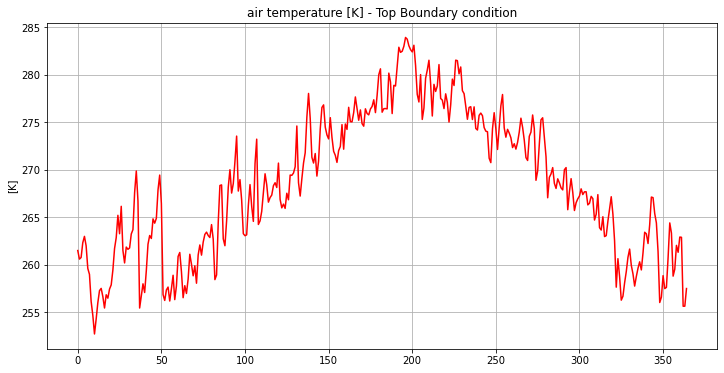

In [17]:
plt.figure(figsize=(12, 6))
plt.title('air temperature [K] - Top Boundary condition')
plt.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
plt.ylabel('[K]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
plt.grid(True)

#### 5. Plotting the observation results:

In [18]:
# Looping over the file names:

# Removing the hash lines in the intial part of the script
# https://stackoverflow.com/questions/11968998/remove-lines-that-contain-certain-string
remove_hashs = ['#']

# Opening the observation.dat file, 
# removing the lines with a hash and storing it in a new file - observation_2.dat

# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_P'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_P'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
        
# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_M'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_M'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
                    
# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_B'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_B'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
        


*Maybe we can combine the above and below cell*

In [19]:
# Reading the csv file and adjusting the index to the required time format
# Coverting saturation to VWC [Liquid]: VWC = saturation * porosity
porosity_peat = 0.5 # Peat layer until 0.385
porosity_mineral = 0.3 # Mineral layer until 2.24 m
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]



# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_P'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_P'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_P'+ str(params[j]) + str(sim_number[k])].index = locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_P'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_P'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100

# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_M'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_M'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_M'+ str(params[j]) + str(sim_number[k])].index = locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_M'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_M'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100

# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_B'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_B'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_B'+ str(params[j]) + str(sim_number[k])].index = locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_B'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_B'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100



In [20]:
# During the simulations, the porosity values of peat and mineral were kept constant for all simulations except when the peat and mineral porosity was varied in their respective simulations
# Therefore we have to change the VWC for these results.
#porosity_peat_range = [0.3, 0.5, 0.9] # Peat layer until 0.385
#porosity_mineral_range = [0.2, 0.3, 0.5] # Mineral layer until 2.24
#depths_peat = [0.04, 0.2] # Since Peat layer until 0.385
#depths_mineral = [0.4, 0.8, 1.2, 1.6] # Mineral layer until 2.24 m

# Changing the VWC for peat
#for i in range(len(porosity_peat_range)):
    #for depth in depths_peat:
            #locals()['df_P'+'por'+str(i)].loc[:,f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_P'+'por'+str(i)].loc[:,f'Soil moisture at - {depth} m (VWC %)']*(porosity_peat_range[i]/porosity_peat)

# Changing the VWC for mineral
#for i in range(len(porosity_mineral_range)):
    #for depth in depths_mineral:
            #locals()['df_M'+'por'+str(i)].loc[:,f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_M'+'por'+str(i)].loc[:,f'Soil moisture at - {depth} m (VWC %)']*(porosity_mineral_range[i]/porosity_mineral)

In [22]:
df_Ptcs0.head()

,time [s],water content [mol],point -0.01 temperature [K],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],...,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days],Soil moisture at - 0.04 m (VWC %),Soil moisture at - 0.2 m (VWC %),Soil moisture at - 0.4 m (VWC %),Soil moisture at - 0.8 m (VWC %),Soil moisture at - 1.2 m (VWC %),Soil moisture at - 1.6 m (VWC %)
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,690870.68548,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,...,0.900467,0.949996,0.949996,0.0,5.490678,4.976632,2.985979,2.985979,2.985979,2.985977
1.0,86400.0,690870.68548,261.271023,264.479314,265.603932,266.945549,268.527668,269.719493,270.052048,270.138915,...,0.900540,0.949996,0.949996,1.0,5.321072,4.352310,2.750128,2.908404,2.967010,2.983787
2.0,172800.0,690870.68548,261.269737,263.659976,264.521168,265.646313,267.236993,268.935859,269.713071,270.058755,...,0.901057,0.949996,0.949996,2.0,5.309711,4.216852,2.632957,2.797194,2.907349,2.968281
3.0,259200.0,690870.68548,262.624091,264.071670,264.612916,265.387646,266.642321,268.308573,269.318247,269.920741,...,0.901905,0.949996,0.949996,3.0,5.315240,4.193775,2.590401,2.727201,2.847471,2.942860
4.0,345600.0,690870.68548,263.225332,264.336887,264.751483,265.351813,266.367675,267.872204,268.953005,269.746229,...,0.902906,0.949996,0.949996,4.0,5.318992,4.190663,2.572544,2.685595,2.799307,2.912813


<AxesSubplot:xlabel='time [days]'>

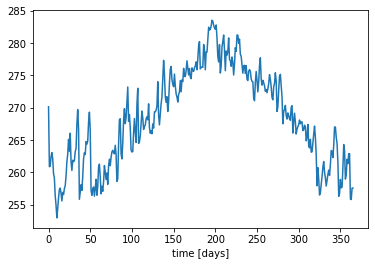

In [23]:
df_Btcs2['point -0.01 temperature [K]'].plot()

#### Plotting the values - An example:
- An example:
##### 1. Subsurface temperature

In [24]:
df_observation = df_Ptcs0.copy()

### Plotting temperature, saturation of liquid, and saturation of ice

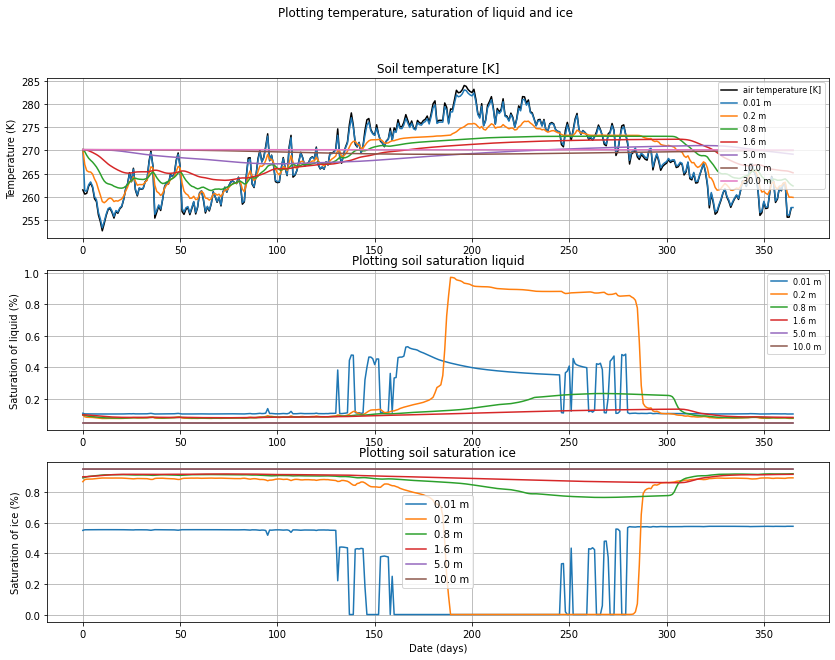

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(w=14,h=10)
fig.suptitle('Plotting temperature, saturation of liquid and ice')

ax1.set_title('Soil temperature [K]')
ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
#ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
ax1.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
#ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')
ax2.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
#ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

In [104]:
# Standard parameters for all cases: - Check out Excel sheet - C:\Users\radhakrishna\OneDrive\Documents\Hannover_PhD\Work\ATS\RKModel\RKModel_info_simulation_strategy.xlsx

# Peat
Ptcs_std = 0.6
Ptcd_std = 0.07
Paf_std = 1 
Pauf_std = 0.5
Ppor_std = 0.5

# Mineral
Mtcs_std = 1.5
Mtcd_std = 0.6
Maf_std = 1 
Mauf_std = 0.5
Mpor_std = 0.3

# Bedrock
Btcs_std = 2
Btcd_std = 1.0
Baf_std = 1.0 
Bauf_std = 0.5
Bpor_std = 0.3


In [27]:
# Variation of parameters: Check out Excel sheet - C:\Users\radhakrishna\OneDrive\Documents\Hannover_PhD\Work\ATS\RKModel\RKModel_info_simulation_strategy.xlsx

# Peat
Ptcs = [0.2, 0.6, 1.0]
Ptcd = [0.03, 0.07, 0.12]
Paf = [0.5, 1.0, 1.5] 
Pauf = [0.1, 0.5, 0.7]
Ppor = [0.3, 0.5, 0.9]

# Mineral
Mtcs = [1, 1.5, 2]
Mtcd = [0.2, 0.6, 1.0]
Maf = [0.5, 1, 1.5] 
Mauf = [0.1, 0.5, 0.7]
Mpor = [0.2, 0.3, 0.5]

# Bedrock
Btcs = [1.5, 2, 3]
Btcd = [0.5, 1, 1.5]
Baf = [0.5, 1, 1.5] 
Bauf = [0.1, 0.5, 0.7]
Bpor = [0.2, 0.3, 0.5]

### Plotting the temperature for different saturated thermal conductivity values at different depths

Text(0, 0.5, 'Temperature (K)')

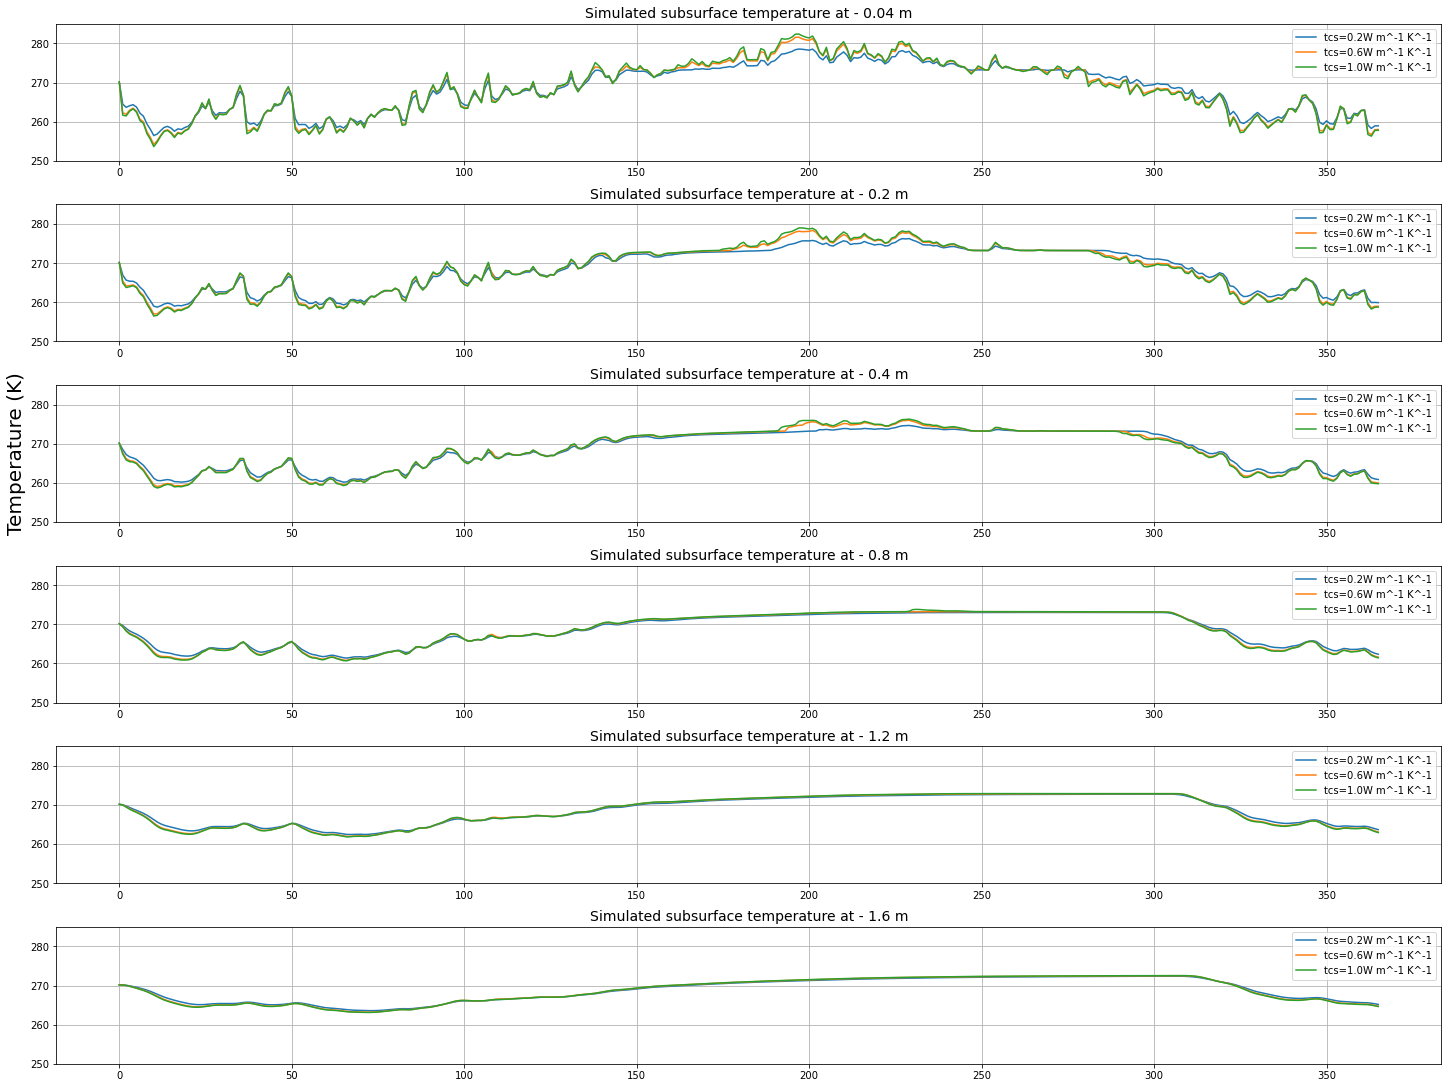

In [29]:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
    for i, values in enumerate(Ptcs):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Ptcs{i}"][f'point -{depth} temperature [K]'], label=f'tcs={values}W m^-1 K^-1')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated subsurface temperature at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

#### Comments:
- The influence of tcs is seen in the initial depths at 0.04, 0.2 and 0.4 m. As expected, higher the tcs value, greater is the subsurface temperature

### Plotting the subsurface moisture for different alpha values at different depths

Text(0, 0.5, 'Saturation of liquid (%)')

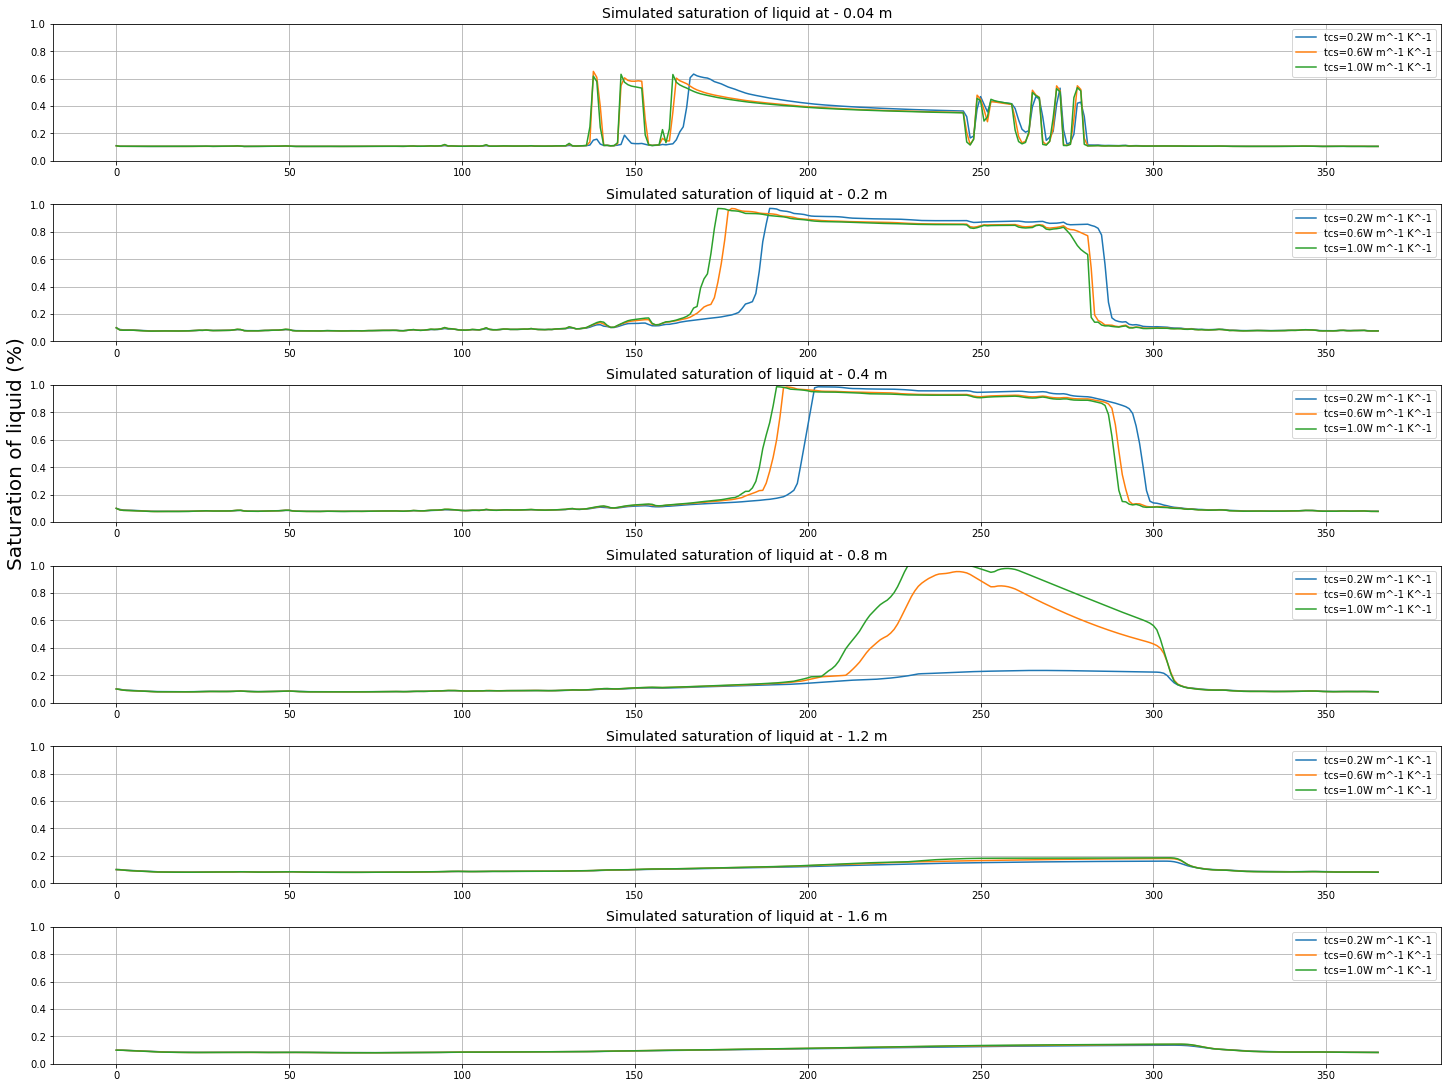

In [30]:
### Plotting the subsurface moisture for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting subsurface moisture at different depths')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
    for i, values in enumerate(Ptcs):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Ptcs{i}"][f'point -{depth} saturation liquid'], label=f'tcs={values}W m^-1 K^-1')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated saturation of liquid at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(0,1.0)
    

f2_ax3.set_ylabel('Saturation of liquid (%)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

Comments:

* Influence on moisture is also clearly seen. As the tcs increases, it increases the temperature within the medium, Hence greater moisture release will occur due to which the saturation of liquid also increases. There is a lag in the moisture increase, as tcs decreases.
* It's also important to note that when the temperature goes above 0°C, thaw occurs. 
* Note that at the depth of 0.8 m, the medium encounters higher moisture content.

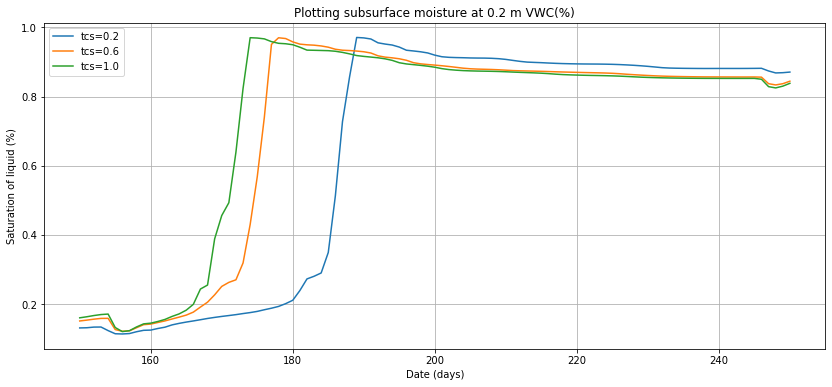

In [31]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(14,6))
plt.title('Plotting subsurface moisture at 0.2 m VWC(%)')



for i, values in enumerate(Ptcs):
    plt.plot(locals()[f"df_Ptcs{i}"]['point -0.2 saturation liquid'][150:250], label=f'tcs={values}')

plt.ylabel('Saturation of liquid (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

### 7. Comparing the simulation results with the measurements
- The measurement data is evaluated in the file 'AWS_final_metdata_2015_20.ipynb' - To get a better overview, view this Jupyter Notebook

In [32]:
filename_measurements

'../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'

In [33]:
df_AWS = pd.read_excel(f'{filename_measurements}',index_col=0,parse_dates=True) 

In [34]:
df_AWS_details = pd.read_excel('../Data/Data_Yakou/Available_data.xlsx', sheet_name='AWS_Yakou_ITP_Data_2019_extract',index_col=0,parse_dates=True)  
df_AWS_details.head()

,Parameter,Product Name & Direction,Variable name,Depth/Height [m],Time steps [mins],Time interval,Units,Comments
Sl.No.,,,,,,,,
1,Wind speed at 10 m (m/s),"010C/020C; 10 m, north",WS_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,m/s,NaN
2,Wind direction at 10 m (°),"010C/020C; 10 m, north",WD_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°,Why is the data all red?
3,Air temperature at 5 m (°C),"HMP45C; 5 m, north",Ta_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°C,NaN
4,Relative humidity at 5 m (%),"HMP45C; 5 m, north",RH_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,%,Is it relative? Says RH - Hence should be rela...
5,Precipitation at 10 m (mm),rain gauge (TE525M; 10 m),Rain,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,mm,Precipitation measurement at 10 m? Seems odd


In [35]:
# Dropping an unnecessary column:
df_AWS.drop(['Unnamed: 34'], axis=1,inplace=True)

In [36]:
### Renaming the columns - 
data_AWS = df_AWS.copy()
data_AWS.columns = df_AWS_details['Parameter'].values
data_AWS.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

### The data has -6999 values for missing data
- Therefore replacing -6999 with NaN vaues

In [37]:
data_AWS_syn = data_AWS.copy()
data_AWS_syn = data_AWS_syn.replace(-6999,None)

In [38]:
data_AWS_prep = data_AWS_syn.copy()

In [39]:
len(data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]])

40078

In [40]:
len(data_AWS_syn['Wind speed at 10 m (m/s)']), len(data_AWS_syn.columns), len(data_AWS_syn['Wind speed at 10 m (m/s)'])*len(data_AWS_syn.columns)

(278132, 33, 9178356)

### Comments:
- Few NaN values are present (278132/9178356 = 3.03% ). Since the data is available every 10 mins, we have considered to resample the data. 
- Find the number of NaN values in each column to identify where they are occuring and then decide weather to consider the data or not? - Try later

### Resampling the data to daily mean values 
* To observe the data on a seasonal scale

In [41]:
data_AWS_syn = data_AWS_syn.resample('D').mean()

#### Precipitation - Daily summation of the values are determined instead of mean

In [42]:
data_AWS_prep_dailysum = data_AWS_prep['Precipitation at 10 m (mm)'].resample('D').sum()

### Reducing the data to the year 2017

In [43]:
data_AWS_syn_2017 = data_AWS_syn.loc['2017']

# Changing the units of temperature to Kelvin

data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.04 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.4 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.4 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.8 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.8 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.6 m (°C)'] + 273.15

In [44]:
# Converting the index of observation dataframe:

df_simulated = df_Ptcs1.copy()

# Slicing only 1 year of simulated data
df_simulated_2017 = df_simulated.loc[0:364]

# Changing the index
df_simulated_2017.index = data_AWS_syn_2017.index

df_simulated_2017.head()

,time [s],water content [mol],point -0.01 temperature [K],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],...,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days],Soil moisture at - 0.04 m (VWC %),Soil moisture at - 0.2 m (VWC %),Soil moisture at - 0.4 m (VWC %),Soil moisture at - 0.8 m (VWC %),Soil moisture at - 1.2 m (VWC %),Soil moisture at - 1.6 m (VWC %)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,690870.685480,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,...,0.900467,0.949996,0.949996,0.0,5.490678,4.976632,2.985979,2.985979,2.985979,2.985977
2017-01-02,86400.0,690870.685482,260.891319,262.279173,263.625888,265.432946,267.676532,269.469255,269.992542,270.132002,...,0.900586,0.949996,0.949996,1.0,5.293382,4.197738,2.668471,2.869310,2.955892,2.982427
2017-01-03,172800.0,690870.685482,260.968201,261.900695,262.828383,264.178518,266.172648,268.427248,269.515121,270.015317,...,0.901330,0.949996,0.949996,2.0,5.289408,4.098678,2.560468,2.739435,2.876189,2.960111
2017-01-04,259200.0,690870.685482,262.428777,262.915598,263.424686,264.251552,265.674662,267.700280,269.007787,269.826506,...,0.902455,0.949996,0.949996,3.0,5.300523,4.103901,2.531669,2.670503,2.806149,2.926360
2017-01-05,345600.0,690870.685482,263.072983,263.440273,263.820006,264.434326,265.527205,267.254236,268.576026,269.600690,...,0.903688,0.949996,0.949996,4.0,5.306897,4.117239,2.523653,2.634280,2.755391,2.889358


### 8. Finding the RMSE value - yearly average, monthly average, plotting time series RMSE value
1. Finding the yearly average
2. Finding the monthly average
3. Time series RMSE value

In [45]:
### Writing a function to find the RMSE value:
def RMSE_function(sim, measured, time_scale, name_VarDepth):
    """
    The function is written to find the RMSE (Root Mean Square Error) between the measured and simulated value.
    
    Parameters
    ------
    
    Input parameters:
    
    sim : Pandas dataframes series with daily simulated values. 
    
    measured: Pandas dataframes series with daily measured values. 
    
    time_scale : Choose the time scale in which you would like your results.
    
    (a). 'yearly' - The RMSE values are averaged for the entire year
    
    (b). 'monthly' - The RMSE values are averaged for the entire month
    
    (c). 'daily' - The daily RMSE values are the output. 
    
    name_VarDepth : Provide the name of the variable and the depth (Easy to create dataframe with different columns as Variable - Depths)
            
    Output parameters:
    
    rmse_yearly : Single value, Finds the RMSE between the simulated and measured - averages it over the year
    
    rmse_monthly : Pandas dataframe, Finds the RMSE between the simulated and measured - averaged over a month 
    
    
    """
    
    if time_scale == 'yearly':
        rmse_yearly = np.sqrt(((sim - measured) ** 2).mean())
        
        return rmse_yearly
    
    elif time_scale == 'monthly':
        
        # Creating a numpy array with month numericals from 1,1,2,3 ..12
        month = np.arange(1,13,1)
        
        # Creating a dataframe with monthly indexes
        rmse_monthly = pd.DataFrame(index=sim.resample('M').mean().index, data=np.arange(1,13,1),columns=[f'{name_VarDepth}'])

        for i in range(len(month)):

            # Extracting the monthly values from January - December
            sim_month = sim[f'2017-{month[i]}']
            measured_month = measured[f'2017-{month[i]}']

            
            # Finding the RMSE value and storing it in a dataframe
            rmse_monthly.iloc[i,0] = np.sqrt(((sim_month - measured_month)**2).mean())
            
        return rmse_monthly

In [46]:
### Example - Creating a loop to store the yearly and monthly RMSE values for all variables

# Depths - Note the numbering
depths = ['0.04','0.2','0.4','0.8','1.2','1.6']

# Creating a numpy array to store the rmse (yearly) values
rmse_yearly_temp = np.array([])
rmse_yearly_mois = np.array([])

# Creating a dataframe to store the monthly RMSE temperature and moisture
rmse_month_values = pd.DataFrame(index=df_simulated_2017['point -0.04 temperature [K]'].resample('M').mean().index, data=None, columns=None)



for i in range(len(depths)):
    
    # Calculating the yearly RMSE values - Temperature & Moisture
    sim_temp = df_simulated_2017[f'point -{depths[i]} temperature [K]']
    measured_temp = data_AWS_syn_2017[f'Soil temperature at - {depths[i]} m (K)']
    
    sim_mois = df_simulated_2017[f'Soil moisture at - {depths[i]} m (VWC %)']
    measured_mois = data_AWS_syn_2017[f'Soil moisture at - {depths[i]} m (%)']
    
    value_temp = RMSE_function(sim_temp, measured_temp, time_scale='yearly', name_VarDepth='Temp-1.6')
    rmse_yearly_temp = np.append(rmse_yearly_temp, value_temp)
    
    value_mois = RMSE_function(sim_mois, measured_mois, time_scale='yearly', name_VarDepth='Temp-1.6')
    rmse_yearly_mois = np.append(rmse_yearly_mois, value_mois)
    
    # Calculating the monthly RMSE values
    name_TempDepth = f'Temp-{depths[i]}'
    name_MoisDepth = f'Mois-{depths[i]}'
    
    rmse_month_values[f'{name_TempDepth}'] = RMSE_function(sim_temp, measured_temp, time_scale='monthly', name_VarDepth='{name_TempDepth}')
    rmse_month_values[f'{name_MoisDepth}'] = RMSE_function(sim_mois, measured_mois, time_scale='monthly', name_VarDepth='{name_MoisDepth}')

In [47]:
rmse_yearly_temp

array([2.68582846, 2.72645448, 2.65622464, 2.61717684, 2.67155987,
       2.37848785])

### Finding the yearly RMSE value for the individual parameters:
1. Find the RMSE value for the simulated and measured results. 
2. For one particular parameter - You will have 18 RMSE values {3 parameter values at 6 depths} - We can plot 'Porosity Vs RMSE' at the six depths in one plot. 
3. Keeping Step 2 in mind: Similarly we can calculate it for the four parameters: Porosity, Pore compressibility, Permeability, Density - We can plot this in four subfigures.
4. We also have three materials which can be plotted in three figures.

In [48]:
# Test
## Step 1 - Find the RMSE value for the simulated and measured results.

# Simulated results: (Excluding the initial value at T = 0)
sim = df_Ptcs0['point -1.6 temperature [K]'][1:].values

# Measurements
measured = data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'].values

RMSE_test = np.sqrt(((sim - measured) ** 2).mean())

RMSE_test

2.3226449546513432

### Storing the RMSE values

In [49]:
# We can store the RMSE values in a pandas dataframe with the index = depth and columns = porosity
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

RMSE_Ptcs_temp = pd.DataFrame(index=depths, columns=Ptcs)
RMSE_Ptcs_mois = pd.DataFrame(index=depths, columns=Ptcs)
RMSE_Ptcs_mois

,0.2,0.6,1.0
0.04,NaN,NaN,NaN
0.20,NaN,NaN,NaN
0.40,NaN,NaN,NaN
0.80,NaN,NaN,NaN
1.20,NaN,NaN,NaN
1.60,NaN,NaN,NaN


In [50]:
# We can store the RMSE values in a pandas dataframe with the index = depth and columns = parameter
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]



# Creating a list for the materials and the parameters
materials = ['P', 'M', 'B']
Therm_parameters = ['tcs','tcd','af','auf']


# Creating the pandas dataframe dynamically for the four physical parameters and the three materials
for a, material in enumerate(materials):
    for b, param in enumerate(Therm_parameters):
        locals()['RMSE_'+f'{material}{param}'+'_temp'] = pd.DataFrame(index=depths, columns=locals()[f'{material}{param}'])
        locals()['RMSE_'+f'{material}{param}'+'_mois'] = pd.DataFrame(index=depths, columns=locals()[f'{material}{param}'])
        
    

In [54]:
RMSE_Pauf_temp

,0.1,0.5,0.7
0.04,NaN,NaN,NaN
0.20,NaN,NaN,NaN
0.40,NaN,NaN,NaN
0.80,NaN,NaN,NaN
1.20,NaN,NaN,NaN
1.60,NaN,NaN,NaN


In [55]:
# Storing the RMSE_values interatively
for a, material in enumerate(materials):
    for b, param in enumerate(Therm_parameters):
        for j, depth in enumerate(depths):
            for k in range(len(locals()[f'{material}{param}'])):
                
                # Simulated value
                sim_temp = locals()[f'df_{material}{param}'+str(k)][f'point -{depth} temperature [K]'][1:].values
                sim_mois = locals()[f'df_{material}{param}'+str(k)][f'Soil moisture at - {depth} m (VWC %)'][1:].values
                # Measured value
                measured_temp = data_AWS_syn_2017[f'Soil temperature at - {depth} m (K)'].values
                measured_mois = data_AWS_syn_2017[f'Soil moisture at - {depth} m (%)'].values
        
                # Determining the RMSE value
                locals()['RMSE_'+f'{material}{param}'+'_temp'].iloc[j,k] = np.sqrt(((sim_temp - measured_temp) ** 2).mean())
                locals()['RMSE_'+f'{material}{param}'+'_mois'].iloc[j,k] = np.sqrt(((sim_mois - measured_mois) ** 2).mean())
                
                # Changing the datatype  to float64
                locals()['RMSE_'+f'{material}{param}'+'_temp'].astype('float64')
                locals()['RMSE_'+f'{material}{param}'+'_mois'].astype('float64')
                

In [63]:
RMSE_Paf_temp

,0.5,1.0,1.5
0.04,3.05303,2.966948,2.881488
0.20,2.936886,2.861082,2.785358
0.40,2.804367,2.735206,2.665782
0.80,2.718516,2.658063,2.598905
1.20,2.773179,2.709567,2.647762
1.60,2.456014,2.401865,2.351052


In [70]:
# Check temperature
measured_temp = data_AWS_syn_2017[f'Soil temperature at - 1.6 m (K)'].values
sim_temp = df_Paf2['point -1.6 temperature [K]'][1:].values
np.sqrt(((measured_temp - sim_temp) ** 2).mean())

2.3510518728871883

In [71]:
# Check moisture
measured_mois = data_AWS_syn_2017[f'Soil moisture at - 0.04 m (%)'].values
sim_mois = df_Paf2['Soil moisture at - 0.04 m (VWC %)'][1:].values
np.sqrt(((measured_mois - sim_mois) ** 2).mean())

14.049192345742988

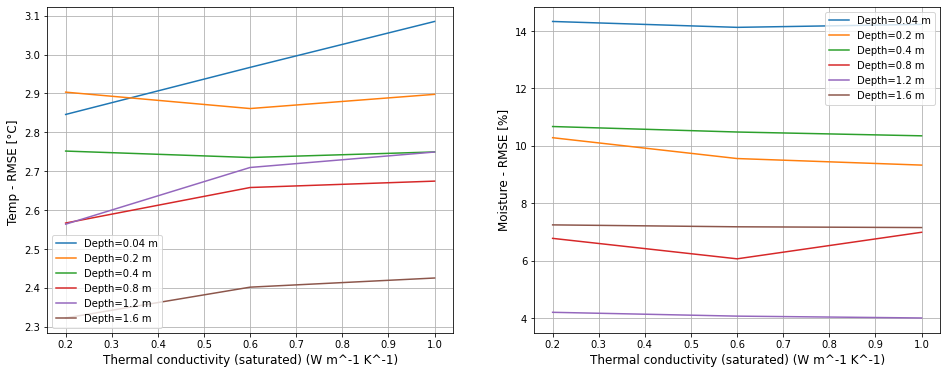

In [73]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)


for i, values in enumerate(RMSE_Ptcs_temp.index):
    ax1.plot(RMSE_Ptcs_temp.iloc[i,:], label=f'Depth={values} m')
    ax2.plot(RMSE_Ptcs_mois.iloc[i,:], label=f'Depth={values} m')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Thermal conductivity (saturated) (W m^-1 K^-1)', fontsize=12)
ax1.set_ylabel('Temp - RMSE [°C] ', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Thermal conductivity (saturated) (W m^-1 K^-1)', fontsize=12)
ax2.set_ylabel('Moisture - RMSE [%]', fontsize=12)
ax2.legend()
ax2.grid(True)

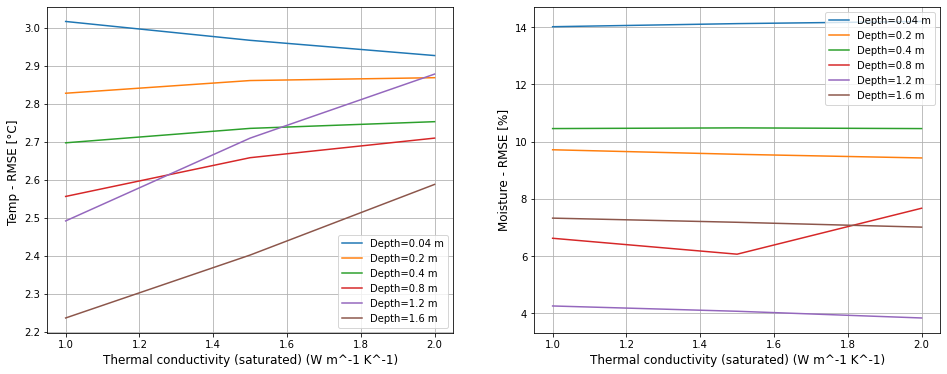

In [75]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)


for i, values in enumerate(RMSE_Mtcs_temp.index):
    ax1.plot(RMSE_Mtcs_temp.iloc[i,:], label=f'Depth={values} m')
    ax2.plot(RMSE_Mtcs_mois.iloc[i,:], label=f'Depth={values} m')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Thermal conductivity (saturated) (W m^-1 K^-1)', fontsize=12)
ax1.set_ylabel('Temp - RMSE [°C] ', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Thermal conductivity (saturated) (W m^-1 K^-1)', fontsize=12)
ax2.set_ylabel('Moisture - RMSE [%]', fontsize=12)
ax2.legend()
ax2.grid(True)

Comments:

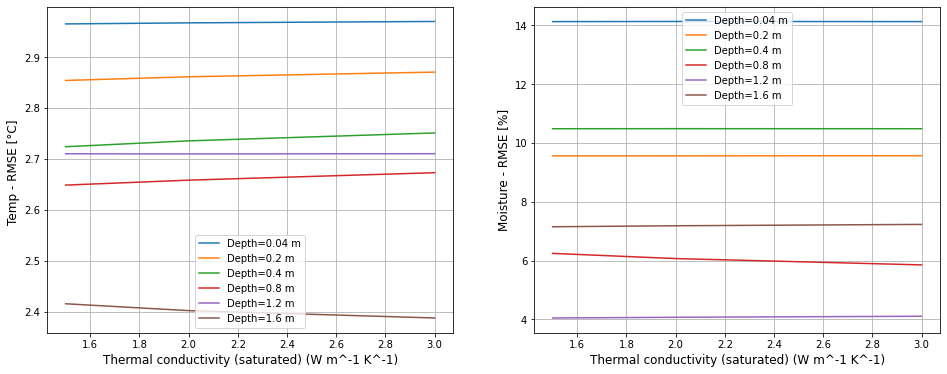

In [78]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)


for i, values in enumerate(RMSE_Mtcs_temp.index):
    ax1.plot(RMSE_Btcs_temp.iloc[i,:], label=f'Depth={values} m')
    ax2.plot(RMSE_Btcs_mois.iloc[i,:], label=f'Depth={values} m')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Thermal conductivity (saturated) (W m^-1 K^-1)', fontsize=12)
ax1.set_ylabel('Temp - RMSE [°C] ', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Thermal conductivity (saturated) (W m^-1 K^-1)', fontsize=12)
ax2.set_ylabel('Moisture - RMSE [%]', fontsize=12)
ax2.legend()
ax2.grid(True)

Comments:


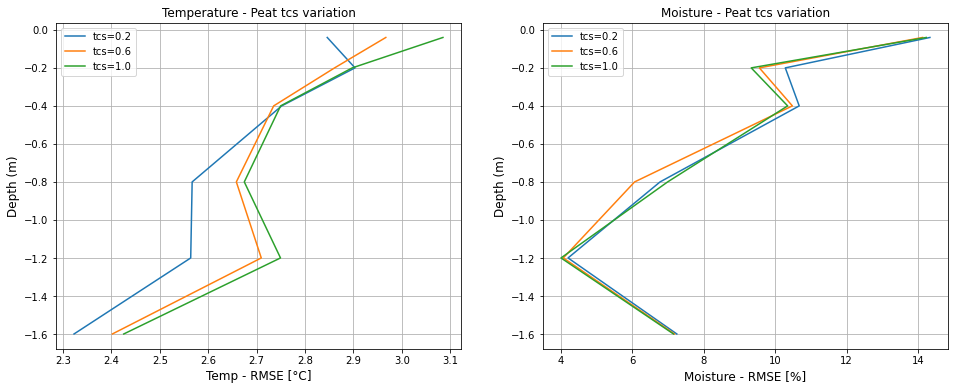

In [79]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)
ax1.set_title('Temperature - Peat tcs variation')
ax2.set_title('Moisture - Peat tcs variation')

for i, values in enumerate(RMSE_Ptcs_temp.columns):
    ax1.plot(RMSE_Ptcs_temp.iloc[:,i].values, - RMSE_Ptcs_temp.index, label=f'tcs={values}')
    ax2.plot(RMSE_Ptcs_mois.iloc[:,i].values, - RMSE_Ptcs_mois.index, label=f'tcs={values}')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Temp - RMSE [°C]', fontsize=12)
ax1.set_ylabel('Depth (m)', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Moisture - RMSE [%]', fontsize=12)
ax2.set_ylabel('Depth (m)', fontsize=12)
ax2.legend()
ax2.grid(True)

### Calculating senstitivity index:
In order to identify sensitive parameters, we will be estimating the sensitivity index $\xi$ which is given by:

\begin{equation}
\xi = \frac{\partial f}{\partial P} \frac{P_{org}}{f_{org}} \times 100
\end{equation}

where, f is the function - modelled results based on P from which we can calculate RMSE, $R^{2}$, or NSE (Nash-Sutcliffe efficiency coefficient)), P is the parameter (alpha, n, wr, porosity ..etc.), $P_{org}$ is the initial parameter and $f_{org}$ is the corresponding function at $P_{org}$. Here, we are assuming the difference between the minimum and maximum value.

* Steps to determine $\xi$:
1. Determine the difference between ($\partial f$ = $f_5$ - $f_1$)  and ($\partial P$ = $P_5$ - $P_1$) where f - RMSE value for subsurface temperature, P - alpha
2. Based on the above equation calculate $\xi$
3. Determine the $\xi$ value at all depths
4. Plot the $\xi$ value along all depths
5. Repeat the same procedure for moisture
5. This procedure is done for one parameter - alpha. Similarly, we can repeat steps [1-5] to calculate $\xi$ for the parameter n, wr.
6. Similarly repeat Step 5 for mineral and bedrock
7. Similarly repeat Step 6 for thermal and physical parameters.

### Sensitivity index:

In [80]:
def sensitivity_index(RMSE, si, parameter):
    
    """
    A function to determine the sensitivity index si. It is given by the following equation:
    \\begin{equation}
        si = \\frac{\\partial f}{\\partial P} \\frac{P_{org}}{f_{org}}
    \\end{equation}
    where, f is the function - modelled results based on P from which we can calculate RMSE, R^{2}, or NSE (Nash-Sutcliffe efficiency coefficient)), 
    P is the parameter (alpha, n, wr, porosity ..etc.), P_{org} is the initial parameter and f_{org} is the corresponding function at P_{org}. 
    Here, we are assuming the difference between the minimum and maximum value.
    
    It involves the following main steps:
    1. Determine the difference between (\\partial f = f_5 - f_1)  and (\\partial P = P_5 - P_1) where f - RMSE value for subsurface temperature, P - alpha
    2. Based on the above equation calculate \\xi
    3. Determine the \\xi value at all depths
    
    Note: We will be only considering the first and last alpha value
    
    PARAMETERS:
    -------------
    INPUT:
    
    RMSE : Pandas dataframe,
    
    It has the calculated RMSE for alpha values of [0.0005, 0.001, 0.01, 0.02, 0.05] with depths varying from [0.04, 0.2, 0.4, 0.8, 1.2, 1.6].
    
    si : Pandas dataframe,
    
    It has an empty dataframe where si calculated values are added at various depths [0.04, 0.2, 0.4, 0.8, 1.2, 1.6] and the 
    columns will be [alpha_temp, alpha_mois, n_temp, n_mois, wr_temp, wr_mois]  
    
    parameter : string,
    
    It is the parameter for which you need to determine the sensitivity index. Ex: 'alpha_temp'
    
    OUTPUT: 
    
    si : Pandas dataframe,
    
    It has the si calculated values at various depths [0.04, 0.2, 0.4, 0.8, 1.2, 1.6] and the 
    columns will be [{param}_temp, {param}_mois]. Here the param = {tcs, tcd, af, auf}
    
    """
    
    # Parameter values
    p_0 = RMSE.columns[0]
    p_2 = RMSE.columns[2]
    p_org = RMSE.columns[1]
    
    # Functions - RMSE values - along the depth
    for i, values in enumerate(si.index):
    #print(i)
        f_0 = RMSE.iloc[i,0]
        f_2 = RMSE.iloc[i,2]
        f_org = RMSE.iloc[i,1]
    
        si.loc[values, parameter] = ((f_2 - f_0)/(p_2 - p_0))*(p_org/f_org)*100

    

In [81]:
# Test
#p_1 = RMSE_Bn_temp.columns[0]
#p_5 = RMSE_Bn_temp.columns[4]
#p_org = RMSE_Bn_temp.columns[2]

#f_1 = RMSE_Bn_temp.iloc[0,0]
#f_5 = RMSE_Bn_temp.iloc[0,4]
#f_org = RMSE_Bn_temp.iloc[0,2]

#value = ((f_5 - f_1)/(p_5 - p_1))*(p_org/f_org)*100
#value

In [82]:
# Creating a empty dataframe to calculate si value 
# Can we write the script iteratively

P_si = pd.DataFrame(index=depths, columns=['tcs_temp', 'tcs_mois', 'tcd_temp', 'tcd_mois', 'af_temp', 'af_mois', 'auf_temp', 'auf_mois'])
M_si = pd.DataFrame(index=depths, columns=['tcs_temp', 'tcs_mois', 'tcd_temp', 'tcd_mois', 'af_temp', 'af_mois', 'auf_temp', 'auf_mois'])
B_si = pd.DataFrame(index=depths, columns=['tcs_temp', 'tcs_mois', 'tcd_temp', 'tcd_mois', 'af_temp', 'af_mois', 'auf_temp', 'auf_mois'])

P_si

,tcs_temp,tcs_mois,tcd_temp,tcd_mois,af_temp,af_mois,auf_temp,auf_mois
0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
materials

['P', 'M', 'B']

In [84]:
Therm_parameters

['tcs', 'tcd', 'af', 'auf']

In [85]:
# Calculating the senstivity values
for a, material in enumerate(materials):
    for b, param in enumerate(Therm_parameters):     
        sensitivity_index(locals()['RMSE_'+f'{material}{param}'+'_temp'], locals()[f'{material}_si'], f'{param}_temp')
        sensitivity_index(locals()['RMSE_'+f'{material}{param}'+'_mois'], locals()[f'{material}_si'], f'{param}_mois')

In [86]:
P_si

,tcs_temp,tcs_mois,tcd_temp,tcd_mois,af_temp,af_mois,auf_temp,auf_mois
0.04,6.043653,-0.538642,-0.164001,0.12043,-5.781783,-1.104809,-1.609868,-0.826496
0.20,-0.148178,-7.483646,-0.410802,-0.461365,-5.296195,-2.46714,0.383835,1.950588
0.40,-0.062157,-2.314885,-0.418273,-0.239088,-5.066717,-2.332971,0.802069,1.262047
0.80,3.040173,2.6192,-0.258907,3.817751,-4.499944,0.136362,0.281843,-15.98551
1.20,5.135519,-3.634628,-0.236296,-0.135017,-4.628654,-0.445407,-0.244664,1.172812
1.60,3.207901,-0.976573,-0.303853,-0.049845,-4.370013,-0.255729,0.193685,0.324817


### Plotting the Sensitivity index values:
1. Four figures will be plotted for porosity, pore compressibility, permeability, and wr
2. Each point in the figure represents one S.I value for one depth and one material
3. We will be having three lines for each material - Peat, Mineral and Bedrock
4. Following steps [1-3] for moisture

In [88]:
P_si['tcs_temp'].values

array([6.043652510086235, -0.14817802804806302, -0.062156710710979654,
       3.040173062148913, 5.135519160548296, 3.207901293569504],
      dtype=object)

In [91]:
M_si

,tcs_temp,tcs_mois,tcd_temp,tcd_mois,af_temp,af_mois,auf_temp,auf_mois
0.04,-4.534363,1.94865,0.214224,0.023797,-5.357722,-1.272606,0.796014,-0.029962
0.20,2.143334,-4.48981,-0.644055,-0.332184,-6.577407,-2.606643,-1.623172,-0.799245
0.40,3.048492,-0.006474,-1.249884,-0.335909,-7.186522,-2.854358,-3.261891,-1.315721
0.80,8.660171,25.937721,-1.365098,4.243447,-6.431048,-2.257627,-4.660812,-2.109094
1.20,21.390983,-15.455045,-1.766441,0.230344,-6.888756,0.692509,-6.431965,0.804194
1.60,21.949888,-6.559722,-1.937338,0.164357,-6.366867,0.244735,-7.320536,0.507582


(-8.0, 24.0)

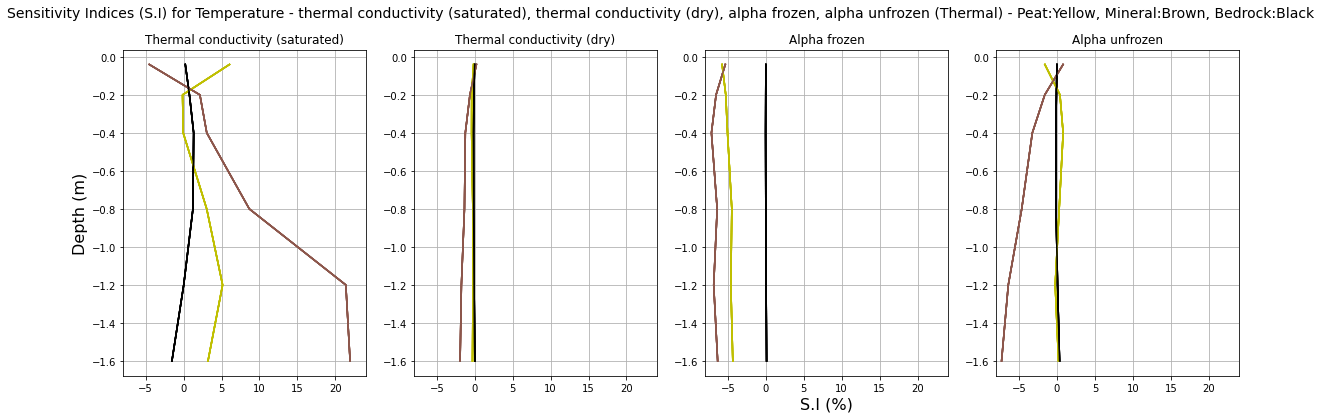

In [93]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)
fig.set_size_inches(20,6)
fig.suptitle('Sensitivity Indices (S.I) for Temperature - thermal conductivity (saturated), thermal conductivity (dry), alpha frozen, alpha unfrozen (Thermal) - Peat:Yellow, Mineral:Brown, Bedrock:Black ', fontsize=14)
ax1.set_title('Thermal conductivity (saturated)')
ax2.set_title('Thermal conductivity (dry)')
ax3.set_title('Alpha frozen')
ax4.set_title('Alpha unfrozen')


for i, depths in enumerate(P_si.index):
    ax1.plot(P_si['tcs_temp'].values, -P_si['tcs_temp'].index, 'y', label='Peat')
    ax2.plot(P_si['tcd_temp'].values, -P_si['tcd_temp'].index,'y', label='Peat')
    ax3.plot(P_si['af_temp'].values, -P_si['af_temp'].index,'y', label='Peat')
    ax4.plot(P_si['auf_temp'].values, -P_si['auf_temp'].index,'y', label='Peat')
 
    ax1.plot(M_si['tcs_temp'].values, -M_si['tcs_temp'].index, 'tab:brown', label='Mineral')
    ax2.plot(M_si['tcd_temp'].values, -M_si['tcd_temp'].index,'tab:brown', label='Mineral')
    ax3.plot(M_si['af_temp'].values, -M_si['af_temp'].index,'tab:brown', label='Mineral')
    ax4.plot(M_si['auf_temp'].values, -M_si['auf_temp'].index,'tab:brown', label='Mineral')
    
    ax1.plot(B_si['tcs_temp'].values, -B_si['tcs_temp'].index, 'k', label='Bedrock')
    ax2.plot(B_si['tcd_temp'].values, -B_si['tcd_temp'].index,'k', label='Bedrock')
    ax3.plot(B_si['af_temp'].values, -B_si['af_temp'].index,'k', label='Bedrock')
    ax4.plot(B_si['auf_temp'].values, -B_si['auf_temp'].index,'k', label='Bedrock')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax3.set_xlabel('S.I (%)', fontsize=16)
ax1.set_ylabel('Depth (m)', fontsize=16)
#ax1.legend()
ax1.grid(True)
#ax2.legend()
ax2.grid(True)
#ax3.legend()
ax3.grid(True)
ax4.grid(True)
ax1.set_xlim(-8,24)
ax2.set_xlim(-8,24)
ax3.set_xlim(-8,24)
ax4.set_xlim(-8,24)


- Comments:
- If the SI values are negative, it means that (f_2 - f_0) is negative --> higher RMSE value at lower parameter values --> Parameter are inversely correlated. +ve S.I means that with the increase in the parameter value, the RMSE value also increases. -ve S.I value means that with the decrease in the parameter value, RMSE value also decreases. 
- Parameters:
    * Thermal conductivity (saturated): The range of variations is [-5, 25]. The influence of tcs is the highest among the different parameters. The effects of tcs is observed mainly with mineral, then peat and to some extent bedrock. 
    * Thermal conductivity (dry): The effects of parameters are not significant. The influence of tcd is highest in the mineral layer. 
    * Alpha (frozen): Both the mineral and peat layer alpha frozen influences the S.I. Mineral > Peat. Bedrock has no influence.
    * Alpha (unfrozen): Here, the influence is mainly seen in mineral layer. Peat and Bedrock has little influence.

    **tcs_mineral, tcs_peat, af_peat, af_mineral, auf_mineral – sensitive parameters; Probably tcs_bedrock and auf_peat**

(-25.0, 25.0)

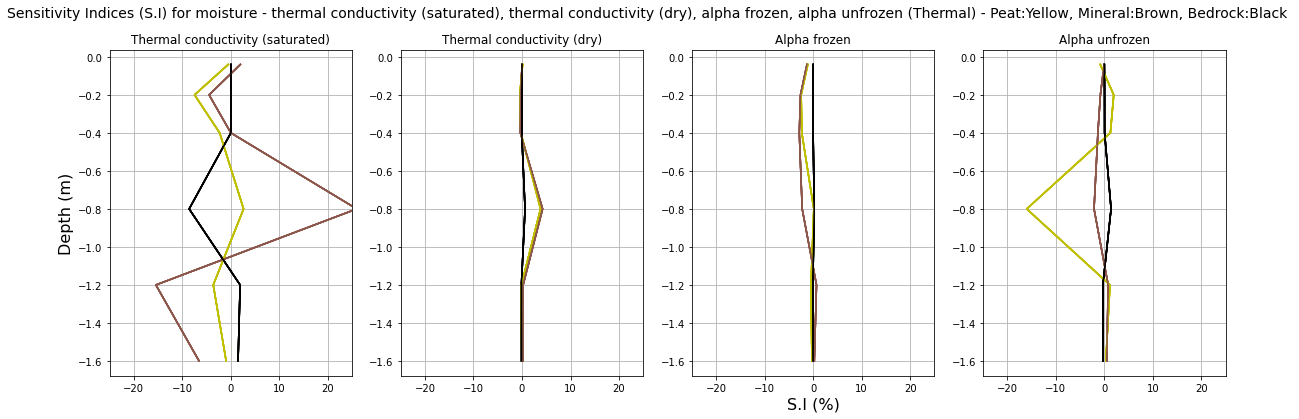

In [101]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)
fig.set_size_inches(20,6)
fig.suptitle('Sensitivity Indices (S.I) for moisture - thermal conductivity (saturated), thermal conductivity (dry), alpha frozen, alpha unfrozen (Thermal) - Peat:Yellow, Mineral:Brown, Bedrock:Black ', fontsize=14)
ax1.set_title('Thermal conductivity (saturated)')
ax2.set_title('Thermal conductivity (dry)')
ax3.set_title('Alpha frozen')
ax4.set_title('Alpha unfrozen')

for i, depths in enumerate(P_si.index):
    ax1.plot(P_si['tcs_mois'].values, -P_si['tcs_mois'].index, 'y', label='Peat')
    ax2.plot(P_si['tcd_mois'].values, -P_si['tcd_mois'].index,'y', label='Peat')
    ax3.plot(P_si['af_mois'].values, -P_si['af_mois'].index,'y', label='Peat')
    ax4.plot(P_si['auf_mois'].values, -P_si['auf_mois'].index,'y', label='Peat')
 
    ax1.plot(M_si['tcs_mois'].values, -M_si['tcs_mois'].index, 'tab:brown', label='Mineral')
    ax2.plot(M_si['tcd_mois'].values, -M_si['tcd_mois'].index,'tab:brown', label='Mineral')
    ax3.plot(M_si['af_mois'].values, -M_si['af_mois'].index,'tab:brown', label='Mineral')
    ax4.plot(M_si['auf_mois'].values, -M_si['auf_mois'].index,'tab:brown', label='Mineral')
    
    ax1.plot(B_si['tcs_mois'].values, -B_si['tcs_mois'].index, 'k', label='Bedrock')
    ax2.plot(B_si['tcd_mois'].values, -B_si['tcd_mois'].index,'k', label='Bedrock')
    ax3.plot(B_si['af_mois'].values, -B_si['af_mois'].index,'k', label='Bedrock')
    ax4.plot(B_si['auf_mois'].values, -B_si['auf_mois'].index,'k', label='Bedrock')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax3.set_xlabel('S.I (%)', fontsize=16)
ax1.set_ylabel('Depth (m)', fontsize=16)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

ax1.set_xlim(-25, 25)
ax2.set_xlim(-25, 25)
ax3.set_xlim(-25, 25)
ax4.set_xlim(-25, 25)

- Comments: 
    * It is observed that the parameters are sensitive mainly at the depth of 0.8 m [it could be that the actual temperature is below the simulated temperature due to which there might be moisture release]
    * tcs: It appears that the thermal conductivity is very sensitive to moisture results. 
    * tcd: Not to sensitive, Expect at the depth of 0.8 m
    * af: It appears to be only slightly sensitive to the moisture results. Mineral > Peat > Bedrock
    * auf: It appears to be only slightly sensitive to the moisture results. Only at 0.8 m, the sensitivity increases (Mainly for peat).   
    **tcs_mineral, tcs_peat, tcs_bedrock, auf_peat – sensitive parameters; Probably tcs_bedrock and auf_peat**

### Storing the sensitivity index values as a csv file for comparsion

In [97]:
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Therm'

In [98]:
P_si.to_csv('Si_Therm_peat.csv')

In [99]:
M_si.to_csv('Si_Therm_mineral.csv')

In [100]:
B_si.to_csv('Si_Therm_bedrock.csv')